In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno


# Data Exploration template Script

## Loadfile

In [12]:
path = "/Users/Camilledamien/Documents/data_science/dataset/"
df_train=pd.read_csv(path+"diamonds.csv",index_col=0)
print(df_train.shape)
df_train.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
#check variables
df_train.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

/Users/Camilledamien/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


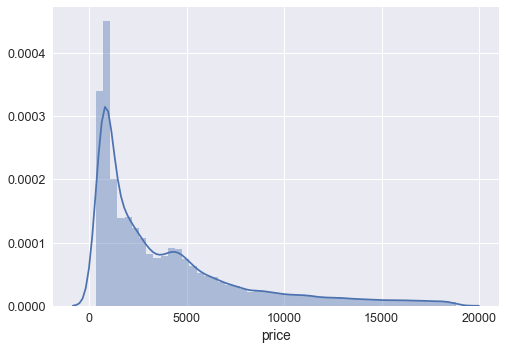

In [14]:
#descriptive statistics target (in case regression problem)
y= 'price'
df_train[y].describe()
sns.distplot(df_train[y]);

In [5]:
#skewness and kurtosis
print("Skewness: %f" % df_train[y].skew())
print("Kurtosis: %f" % df_train[y].kurt())

Skewness: 1.618395
Kurtosis: 2.177696


In [ ]:
#si Target est une classe
plt.figure(figsize = (12, 6))
sns.countplot(x = y , data = df_train)
xt = plt.xticks(rotation=45)

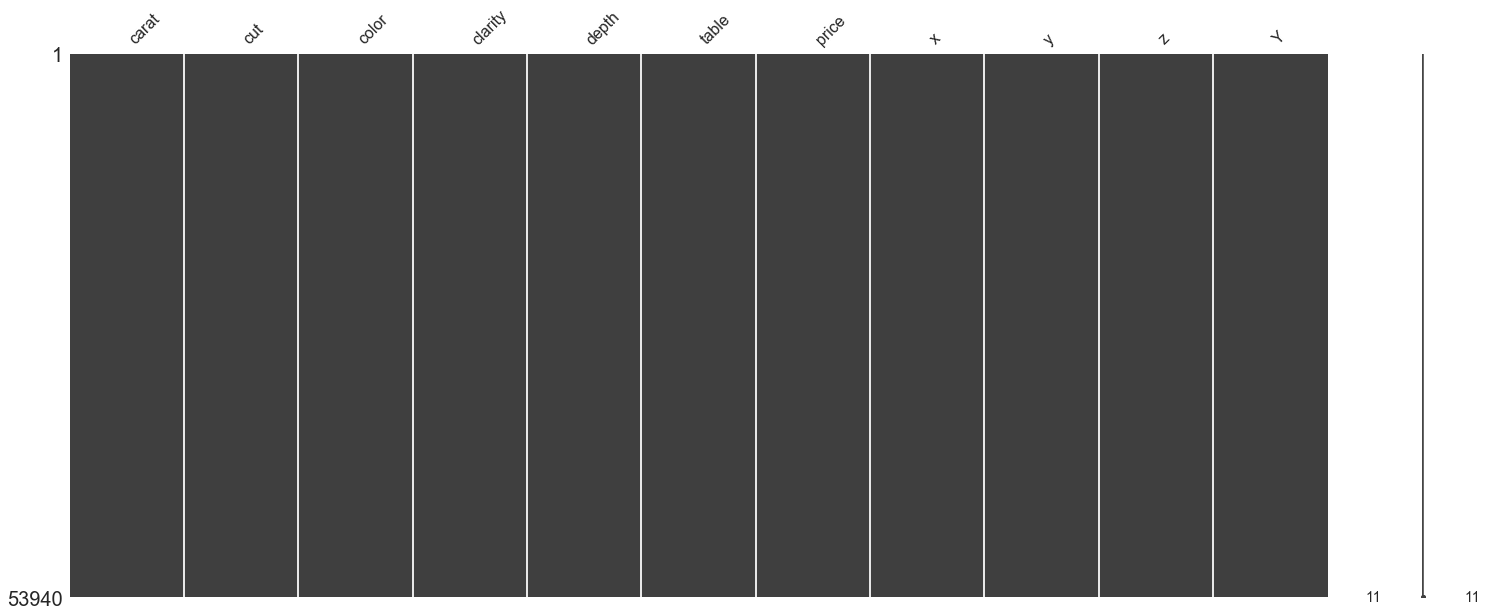

In [6]:
#check missing value per variable
msno.matrix(df_train)

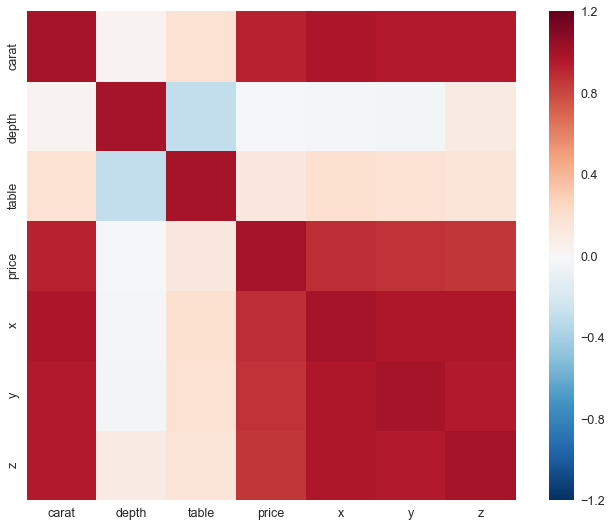

In [15]:
#correlation matrix to see what happen between numerical variables
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.2, square=True);

In [18]:
eig_vals, eig_vecs = np.linalg.eig(corrmat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.45244549  0.03469601  0.00549481 -0.06835945  0.42588029  0.76815114
   0.13399948]
 [-0.00091613  0.73067971 -0.67282929 -0.047248   -0.05560026  0.01445027
  -0.08873829]
 [ 0.09951609 -0.67506738 -0.72806947 -0.0595406  -0.00204926 -0.02526831
  -0.01037614]
 [ 0.42551927  0.03525794  0.10544948 -0.84977817 -0.08281429 -0.27330947
  -0.05377206]
 [ 0.45321251 -0.00351255  0.03950882  0.24299509 -0.82865822  0.19846061
   0.08898016]
 [ 0.4472649  -0.00215791  0.05418879  0.32846061  0.20885709 -0.21526655
  -0.77405793]
 [ 0.44595366  0.08903518 -0.03960344  0.31700727  0.27995794 -0.4986704
   0.60339656]]

Eigenvalues 
[ 4.7639148   1.28586808  0.69081126  0.17375333  0.01239871  0.03294659
  0.04030722]


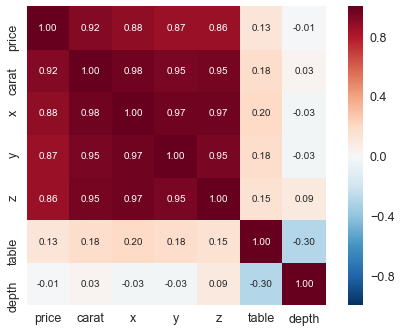

In [16]:
#correlation matrix with Y (main)
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, y)[y].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [26]:
cols

Index(['price', 'carat', 'x', 'y', 'z', 'table', 'depth'], dtype='object')

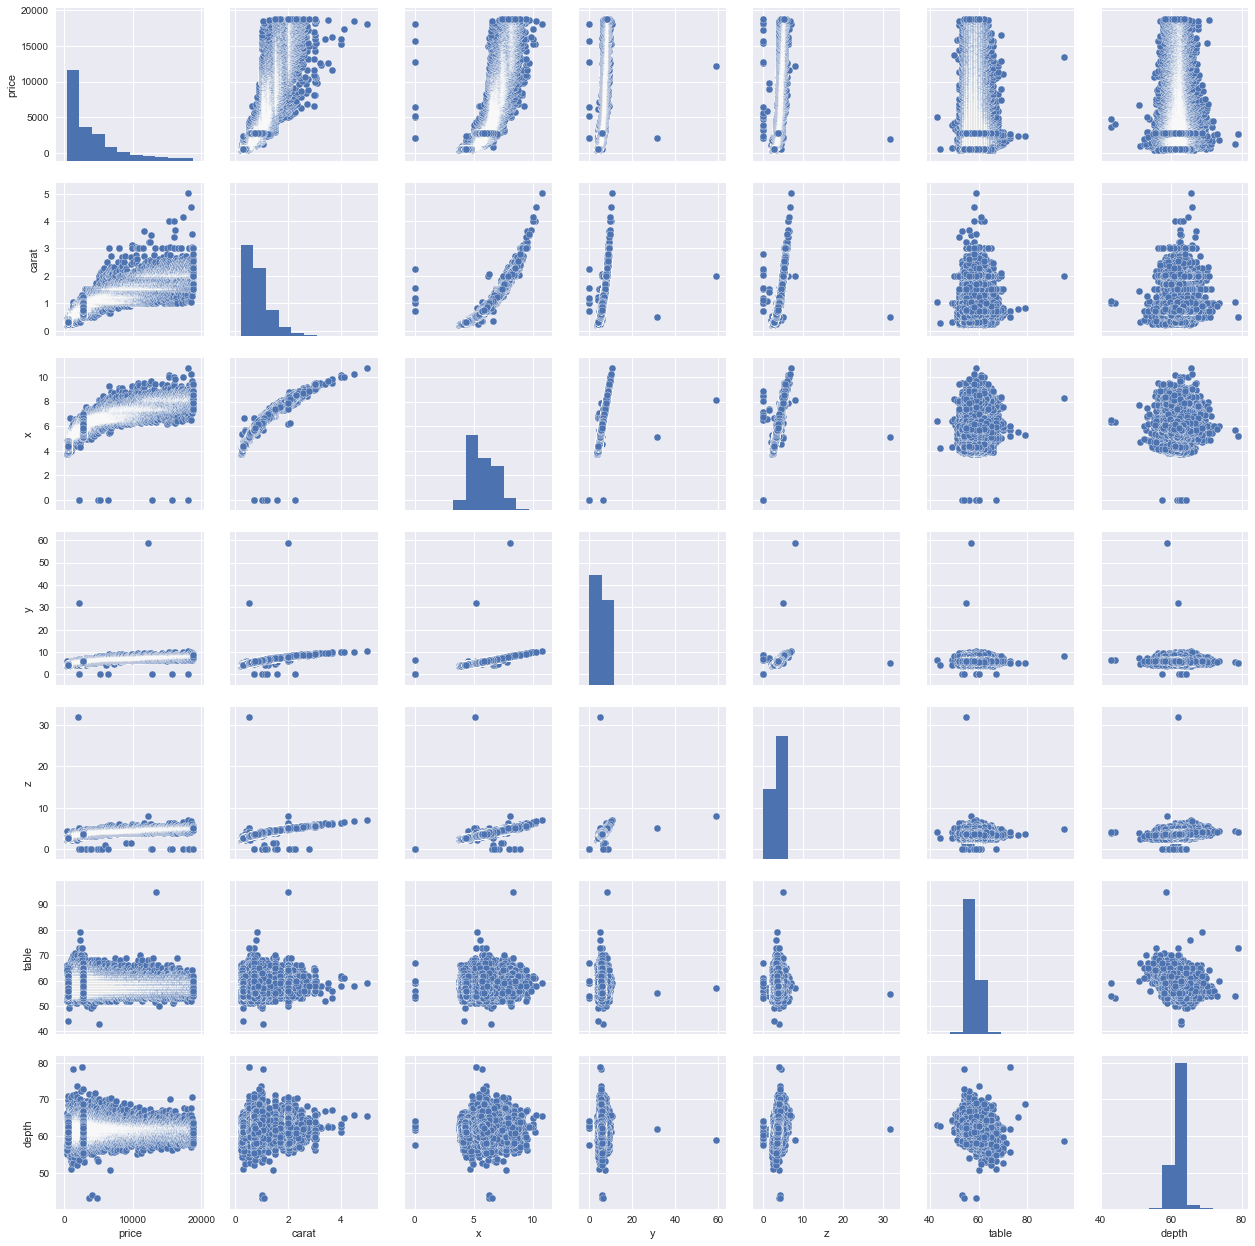

In [27]:
#plot most correlate variable (scatterplot)
sns.set()
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

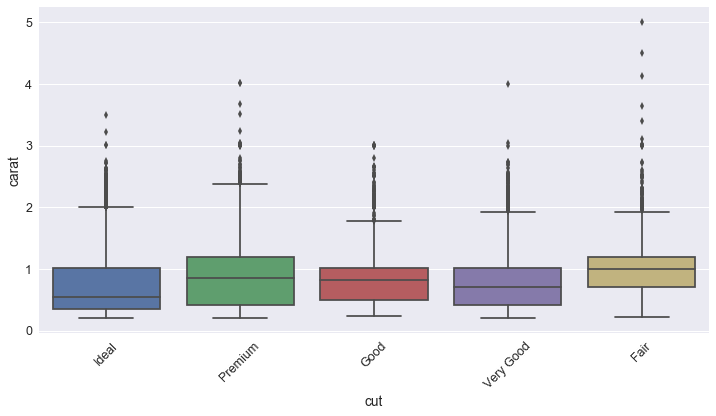

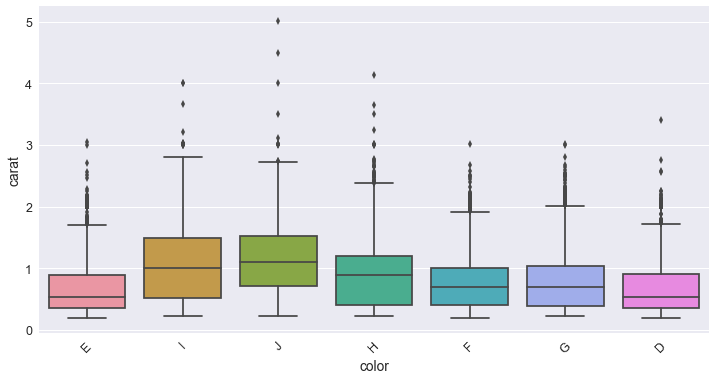

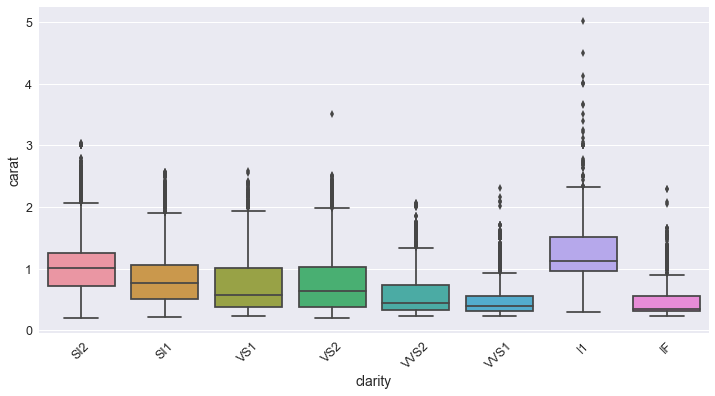

In [24]:
#box plot (effet des classes sur Y)
y = 'carat'
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    plt.figure(figsize = (12, 6))
    sns.boxplot(x = col , y = y,  data = df_train)
    xt = plt.xticks(rotation=45)

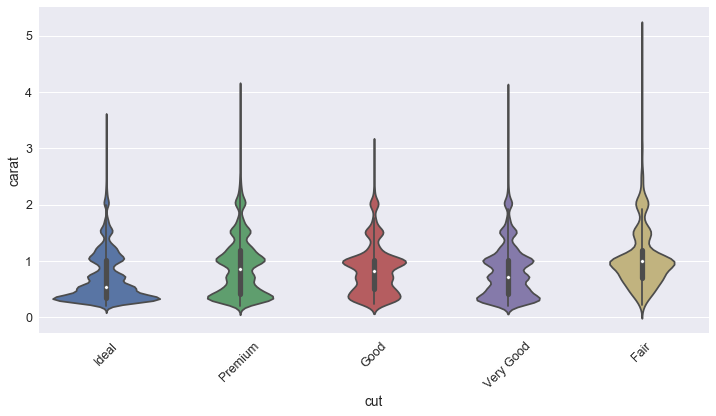

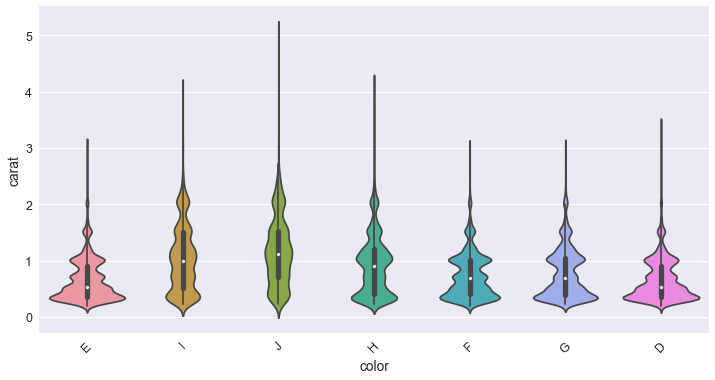

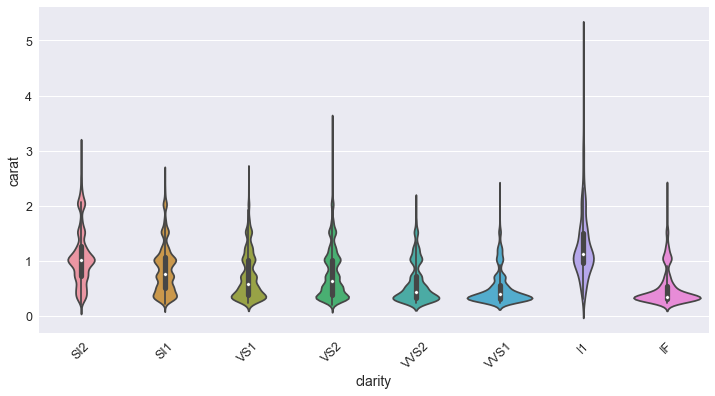

In [25]:
#violin plot (effet des classes sur Y)
for col in categorical_cols:
    plt.figure(figsize = (12, 6))
    sns.violinplot(x = col , y = y,  data = df_train)
    xt = plt.xticks(rotation=45)